In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import glob
from copy import deepcopy

In [2]:
results_folder = "results"
df_experiment = pd.DataFrame()

In [3]:
print(f"{len(os.listdir(results_folder))} results")

80 results


In [4]:
for experiment_folder in os.listdir(results_folder):
    experiment_files = os.listdir(os.path.join(results_folder,experiment_folder))

    if len(experiment_files) != 3:
        continue
    
    for file in experiment_files:
        
        read_file = os.path.join(results_folder,experiment_folder,file)

        
        
        if "config" in file:
            df_config =pd.read_csv(read_file)
            
        if "test_metrics" in file:
            df_test = pd.read_csv(read_file)
            
        if "benchmark" in file:
            df_benchmark = pd.read_csv(read_file)
            
            avg_time = df_benchmark.Time.mean()
            avg_pop = df_benchmark.Avg.iloc[-1]
            best_pop = df_benchmark.Best.iloc[-1]
            worst_pop = df_benchmark.Worst.iloc[-1]
            
            df_benchmark = pd.DataFrame({"Time": [avg_time],"Avg":[avg_pop],"Worst":[worst_pop],"Best":[best_pop]})

    row = pd.concat((df_test,df_benchmark,df_config),axis=1)

    df_experiment = pd.concat((df_experiment,row))


df_test = deepcopy(df_test)
df_benchmark = deepcopy(df_benchmark)
df_test[:] = np.NaN
df_benchmark[:] = np.NaN
for experiment_folder in os.listdir(results_folder):
    experiment_files = os.listdir(os.path.join(results_folder,experiment_folder))

    if len(experiment_files) < 3:

        
        read_file = os.path.join(results_folder,experiment_folder,"config.csv")
        df_config =pd.read_csv(read_file)

        if df_config.algorithm.item()!="rfs":
            continue

        row = pd.concat((df_test,df_benchmark,df_config),axis=1)
        print(row)
    
        df_experiment = pd.concat((df_experiment,row))

df_experiment = df_experiment.reset_index(drop=True)

   F1  Accuracy  ROC AUC Best Chromosome  Time  Avg  Worst  Best  \
0 NaN       NaN      NaN             NaN   NaN  NaN    NaN   NaN   

         dataset crossover_choice  mutation_rate metric_choice  \
0  hiva_agnostic         onepoint            0.2            f1   

   population_size  elitism  evolution_rounds  stopping_threshold     model  \
0              150        2               150             0.99999  logistic   

  algorithm backend_prefer  
0       rfs      processes  
   F1  Accuracy  ROC AUC Best Chromosome  Time  Avg  Worst  Best  \
0 NaN       NaN      NaN             NaN   NaN  NaN    NaN   NaN   

         dataset crossover_choice  mutation_rate metric_choice  \
0  gina_agnostic         onepoint            0.2            f1   

   population_size  elitism  evolution_rounds  stopping_threshold model  \
0              150        2               150             0.99999   mlp   

  algorithm backend_prefer  
0       rfs      processes  
   F1  Accuracy  ROC AUC Best Chro

In [5]:
df_metrics = df_experiment[df_experiment.backend_prefer=="processes"].reset_index(drop=True)

In [6]:
df_experiment.groupby(["model","algorithm","dataset"])[["F1","Accuracy","ROC AUC"]].mean(1).unstack(-1).unstack(0).stack()

F1                               \
dataset                   gina_agnostic hiva_agnostic sylva_agnostic   
algorithm        model                                                 
baseline_metrics logistic      0.796512      0.400000       0.943820   
                 mlp           0.875000      0.380952       0.943820   
                 xgboost       0.928144      0.315789       0.931818   
ga_joblib        logistic      0.799923      0.431677       0.931034   
                 mlp           0.889109      0.500000       0.949721   
                 xgboost       0.923753      0.363636       0.955056   
ga_seq           logistic      0.795181      0.461538       0.943820   
                 mlp           0.890855      0.500000       0.949721   
                 xgboost       0.923977      0.363636       0.955056   
ga_spark         logistic      0.795181      0.428571       0.931034   
                 mlp           0.888235      0.500000       0.949721   
                 xgboost       0.923529      0.285714       0.937853   
random           logistic      0.793003      0.384615       0.949153   
                 mlp           0.875740      0.454545       0.928962   
                 xgboost       0.930636      0.300000       0.937853   
rfs              logistic      0.801153           NaN       0.895349   

                               Accuracy                               \
dataset                   gina_agnostic hiva_agnostic sylva_agnostic   
algorithm        model                                                 
baseline_metrics logistic      0.798271      0.964539       0.993056   
                 mlp           0.878963      0.969267       0.993056   
                 xgboost       0.930836      0.969267       0.991667   
ga_joblib        logistic      0.805476      0.965721       0.991667   
                 mlp           0.891451      0.971631       0.993750   
                 xgboost       0.925072      0.966903       0.994444   
ga_seq           logistic      0.804035      0.966903       0.993056   
                 mlp           0.893372      0.971631       0.993750   
                 xgboost       0.925072      0.966903       0.994444   
ga_spark         logistic      0.804035      0.962175       0.991667   
                 mlp           0.890490      0.971631       0.993750   
                 xgboost       0.925072      0.964539       0.992361   
random           logistic      0.795389      0.962175       0.993750   
                 mlp           0.878963      0.971631       0.990972   
                 xgboost       0.930836      0.966903       0.992361   
rfs              logistic      0.801153           NaN       0.987500   

                                ROC AUC                               
dataset                   gina_agnostic hiva_agnostic sylva_agnostic  
algorithm        model                                                
baseline_metrics logistic      0.798312      0.660539       0.970060  
                 mlp           0.878688      0.630882       0.970060  
                 xgboost       0.930489      0.598775       0.958824  
ga_joblib        logistic      0.805248      0.677206       0.953576  
                 mlp           0.891331      0.696324       0.975678  
                 xgboost       0.925015      0.629657       0.976048  
ga_seq           logistic      0.803579      0.693873       0.970060  
                 mlp           0.893225      0.696324       0.975678  
                 xgboost       0.925056      0.629657       0.976048  
ga_spark         logistic      0.803579      0.691422       0.953576  
                 mlp           0.890384      0.696324       0.975678  
                 xgboost       0.924973      0.596324       0.964442  
random           logistic      0.795388      0.659314       0.970430  
                 mlp           0.878771      0.664216       0.974197  
                 xgboost       0.930988      0.597549       0.964442  
rfs              logi

In [7]:
# # FOLDER REMOVING SCRIPT, SKIP IT #

# import shutil
# ct = 0
# for experiment_folder in os.listdir(results_folder):
#     experiment_files = os.listdir(os.path.join(results_folder,experiment_folder))

#     # if len(experiment_files) != 3:
#     #     continue
    
#     for file in experiment_files:
        
#         read_file = os.path.join(results_folder,experiment_folder,file)

#         if "config" in file:
#             df_config =pd.read_csv(read_file)
        
#             if df_config["algorithm"][0] == "ga_spark":
#                 # print(df_config["algorithm"])
#                 # print(df_config["model"])
#                 # print(df_config["dataset"])
#                 # print(read_file)
#                 print(os.path.join(results_folder,experiment_folder))
#                 # shutil.rmtree(os.path.join(results_folder,experiment_folder))
#                 ct += 1
# print(ct)

In [8]:
# # TEST SCRIPT, SKIP #

# ct = 0
# algor = "baseline_metrics"
# for experiment_folder in os.listdir(results_folder):
#     experiment_files = os.listdir(os.path.join(results_folder,experiment_folder))

#     # if len(experiment_files) != 3:
#     #     continue
    
#     for file in experiment_files:
        
#         read_file = os.path.join(results_folder,experiment_folder,file)

#         if "config" in file:
#             df_config =pd.read_csv(read_file)
        
#             if df_config["algorithm"][0] == algor:
#                 print()
#                 print(df_config["model"][0])
#                 print(df_config["dataset"][0])
#                 print(os.path.join(results_folder,experiment_folder))
#                 ct += 1
# print(ct)

In [9]:
models = ["mlp","xgboost","logistic"]
datasets = ["gina_agnostic","hiva_agnostic","sylva_agnostic"]
algorithms = ["baseline_metrics","rfs","ga_seq","random","ga_joblib","ga_spark"][::-1]

In [21]:
df_metrics = df_experiment.groupby(["dataset","model","algorithm"])[["F1","Accuracy","ROC AUC"]].mean().unstack(level="dataset").reindex(index=algorithms, level=1).reindex(index=models,level=0).stack(0,dropna=False).unstack()#.swaplevel(0, 1).sort_index(axis=1, level=0)
df_metrics = df_metrics.applymap(lambda x: str(np.round(x,3)))
df_metrics.loc["mlp"].loc["rfs"] = "NaN"
df_metrics

dataset                   gina_agnostic                hiva_agnostic         \
                               Accuracy     F1 ROC AUC      Accuracy     F1   
model    algorithm                                                            
mlp      ga_spark                  0.89  0.888    0.89         0.972    0.5   
         ga_joblib                0.891  0.889   0.891         0.972    0.5   
         random                   0.879  0.876   0.879         0.972  0.455   
         ga_seq                   0.893  0.891   0.893         0.972    0.5   
         rfs                        NaN    NaN     NaN           NaN    NaN   
         baseline_metrics         0.879  0.875   0.879         0.969  0.381   
xgboost  ga_spark                 0.925  0.924   0.925         0.965  0.286   
         ga_joblib                0.925  0.924   0.925         0.967  0.364   
         random                   0.931  0.931   0.931         0.967    0.3   
         ga_seq                   0.925  0.924   0.925         0.967  0.364   
         rfs                        nan    nan     nan           nan    nan   
         baseline_metrics         0.931  0.928    0.93         0.969  0.316   
logistic ga_spark                 0.804  0.795   0.804         0.962  0.429   
         ga_joblib                0.805    0.8   0.805         0.966  0.432   
         random                   0.795  0.793   0.795         0.962  0.385   
         ga_seq                   0.804  0.795   0.804         0.967  0.462   
         rfs                      0.801  0.801   0.801           nan    nan   
         baseline_metrics         0.798  0.797   0.798         0.965    0.4   

dataset                           sylva_agnostic                 
                          ROC AUC       Accuracy     F1 ROC AUC  
model    algorithm                                               
mlp      ga_spark           0.696          0.994   0.95   0.976  
         ga_joblib          0.696          0.994   0.95   0.976  
         random             0.664          0.991  0.929   0.974  
         ga_seq             0.696          0.994   0.95   0.976  
         rfs                  NaN            NaN    NaN     NaN  
         baseline_metrics   0.631          0.993  0.944    0.97  
xgboost  ga_spark           0.596          0.992  0.938   0.964  
         ga_joblib           0.63          0.994  0.955   0.976  
         random             0.598          0.992  0.938   0.964  
         ga_seq              0.63          0.994  0.955   0.976  
         rfs                  nan            nan    nan     nan  
         baseline_metrics   0.599          0.992  0.932   0.959  
logistic ga_spark           0.691          0.992  0.931   0.954  
         ga_joblib          0.677          0.992  0.931   0.954  
         random             0.659          0.994  0.949    0.97  
         ga_seq             0.694          0.993  0.944    0.97  
         rfs                  nan          0.988  0.895    0.93  
         baseline_metrics   0.661          0.993  0.944    0.97

In [11]:
df_metrics.rename(level="algorithm",mapper={algo:algo.replace("_","\_") for algo in algorithms},inplace=True)
df_metrics.rename(level="algorithm",mapper={"baseline\_metrics":"baseline"},inplace=True)
df_metrics.rename(level="dataset",columns={data:data.replace("_","\_") for data in datasets},inplace=True)
print(df_metrics.to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllll}
\toprule
 & dataset & \multicolumn{3}{c}{gina\_agnostic} & \multicolumn{3}{c}{hiva\_agnostic} & \multicolumn{3}{c}{sylva\_agnostic} \\
 &  & Accuracy & F1 & ROC AUC & Accuracy & F1 & ROC AUC & Accuracy & F1 & ROC AUC \\
model & algorithm &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{mlp} & ga\_spark & 0.89 & 0.888 & 0.89 & 0.972 & 0.5 & 0.696 & 0.994 & 0.95 & 0.976 \\
 & ga\_joblib & 0.891 & 0.889 & 0.891 & 0.972 & 0.5 & 0.696 & 0.994 & 0.95 & 0.976 \\
 & random & 0.879 & 0.876 & 0.879 & 0.972 & 0.455 & 0.664 & 0.991 & 0.929 & 0.974 \\
 & ga\_seq & 0.893 & 0.891 & 0.893 & 0.972 & 0.5 & 0.696 & 0.994 & 0.95 & 0.976 \\
 & rfs & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
 & baseline & 0.879 & 0.875 & 0.879 & 0.969 & 0.381 & 0.631 & 0.993 & 0.944 & 0.97 \\
\cline{1-11}
\multirow[t]{6}{*}{xgboost} & ga\_spark & 0.925 & 0.924 & 0.925 & 0.965 & 0.286 & 0.596 & 0.992 & 0.938 & 0.964 \\
 & ga\_joblib & 0.925 & 0.924 & 0.925 & 0.967 & 0.364 & 

In [25]:
df_times = df_experiment[df_experiment.backend_prefer=="processes"].reset_index(drop=True).groupby(["dataset","model","algorithm"])[["Time"]].mean().unstack(level="dataset").reindex(index=algorithms,level=1).reindex(index=models,level=0)
df_times = df_times.applymap(lambda x: str(np.round(x,3)))
df_times.columns = df_times.columns.droplevel(0)
df_times

dataset                   gina_agnostic hiva_agnostic sylva_agnostic
model    algorithm                                                  
mlp      ga_spark                17.541        46.471         20.441
         ga_joblib               13.558         35.05         20.806
         random                  280.24       503.329        493.163
         ga_seq                 250.116        494.79        535.266
         rfs                        nan           nan            nan
         baseline_metrics         2.259         5.301          3.589
xgboost  ga_spark                43.835        31.333          24.76
         ga_joblib                22.16        34.257         25.515
         random                 322.759        72.523        227.809
         ga_seq                  90.887        72.568         66.404
         rfs                        nan           nan            nan
         baseline_metrics         0.872         1.177          0.869
logistic ga_spark                 5.768         5.336          2.601
         ga_joblib                9.455         9.166          2.775
         random                  12.028        11.918         19.987
         ga_seq                   7.429        11.679         22.798
         rfs                  44954.382           nan      16359.015
         baseline_metrics         0.117         0.186           0.37

In [13]:
df_times.rename(level="algorithm",mapper={algo:algo.replace("_","\_") for algo in algorithms},inplace=True)
df_times.rename(level="algorithm",mapper={"baseline\_metrics":"baseline"},inplace=True)
df_times.rename(level="dataset",columns={data:data.replace("_","\_") for data in datasets},inplace=True)
print(df_times.to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllll}
\toprule
 & dataset & gina\_agnostic & hiva\_agnostic & sylva\_agnostic \\
model & algorithm &  &  &  \\
\midrule
\multirow[t]{6}{*}{mlp} & ga\_spark & 17.541 & 46.471 & 20.441 \\
 & ga\_joblib & 13.558 & 35.05 & 20.806 \\
 & random & 280.24 & 503.329 & 493.163 \\
 & ga\_seq & 250.116 & 494.79 & 535.266 \\
 & rfs & nan & nan & nan \\
 & baseline & 2.259 & 5.301 & 3.589 \\
\cline{1-5}
\multirow[t]{6}{*}{xgboost} & ga\_spark & 43.835 & 31.333 & 24.76 \\
 & ga\_joblib & 22.16 & 34.257 & 25.515 \\
 & random & 322.759 & 72.523 & 227.809 \\
 & ga\_seq & 90.887 & 72.568 & 66.404 \\
 & rfs & nan & nan & nan \\
 & baseline & 0.872 & 1.177 & 0.869 \\
\cline{1-5}
\multirow[t]{6}{*}{logistic} & ga\_spark & 5.768 & 5.336 & 2.601 \\
 & ga\_joblib & 9.455 & 9.166 & 2.775 \\
 & random & 12.028 & 11.918 & 19.987 \\
 & ga\_seq & 7.429 & 11.679 & 22.798 \\
 & rfs & 44954.382 & nan & 16359.015 \\
 & baseline & 0.117 & 0.186 & 0.37 \\
\cline{1-5}
\bottomrule
\end{tabular}



## Jaccard Overlap

In [26]:
import itertools

In [27]:
list(itertools.product(algorithms,algorithms))

[('ga_spark', 'ga_spark'),
 ('ga_spark', 'ga_joblib'),
 ('ga_spark', 'random'),
 ('ga_spark', 'ga_seq'),
 ('ga_spark', 'rfs'),
 ('ga_spark', 'baseline_metrics'),
 ('ga_joblib', 'ga_spark'),
 ('ga_joblib', 'ga_joblib'),
 ('ga_joblib', 'random'),
 ('ga_joblib', 'ga_seq'),
 ('ga_joblib', 'rfs'),
 ('ga_joblib', 'baseline_metrics'),
 ('random', 'ga_spark'),
 ('random', 'ga_joblib'),
 ('random', 'random'),
 ('random', 'ga_seq'),
 ('random', 'rfs'),
 ('random', 'baseline_metrics'),
 ('ga_seq', 'ga_spark'),
 ('ga_seq', 'ga_joblib'),
 ('ga_seq', 'random'),
 ('ga_seq', 'ga_seq'),
 ('ga_seq', 'rfs'),
 ('ga_seq', 'baseline_metrics'),
 ('rfs', 'ga_spark'),
 ('rfs', 'ga_joblib'),
 ('rfs', 'random'),
 ('rfs', 'ga_seq'),
 ('rfs', 'rfs'),
 ('rfs', 'baseline_metrics'),
 ('baseline_metrics', 'ga_spark'),
 ('baseline_metrics', 'ga_joblib'),
 ('baseline_metrics', 'random'),
 ('baseline_metrics', 'ga_seq'),
 ('baseline_metrics', 'rfs'),
 ('baseline_metrics', 'baseline_metrics')]

In [28]:
from scipy.spatial.distance import jaccard

In [69]:
def feature_jaccard_overlap(df,dataset,algorithms):
    pairwise_comparisons = list(itertools.product(algorithms,algorithms))
    df = df[df.dataset==dataset]
    df_overlap = pd.DataFrame(index=algorithms,columns=algorithms,dtype=float)
    for algo1,algo2 in pairwise_comparisons:
        try:
            chromosome1 = eval(df[df.algorithm==algo1]["Best Chromosome"].values[0].replace(" ",","))
            chromosome2 = eval(df[df.algorithm==algo2]["Best Chromosome"].values[0].replace(" ",","))
            overlap = 1-jaccard(chromosome1,chromosome2)
            # print(chromosome1,chromosome2)
            # print(algo1,algo2,overlap)
            df_overlap.loc[algo1.replace("\\",""),algo2.replace("\\","")] = overlap
        except:
            continue

    return df_overlap

df_subset = df_experiment[(df_experiment.backend_prefer=="processes") & (df_experiment.model=="logistic")].reset_index(drop=True)
df_logistic_overlap = feature_jaccard_overlap(df=df_subset,dataset="sylva_agnostic",algorithms=algorithms)

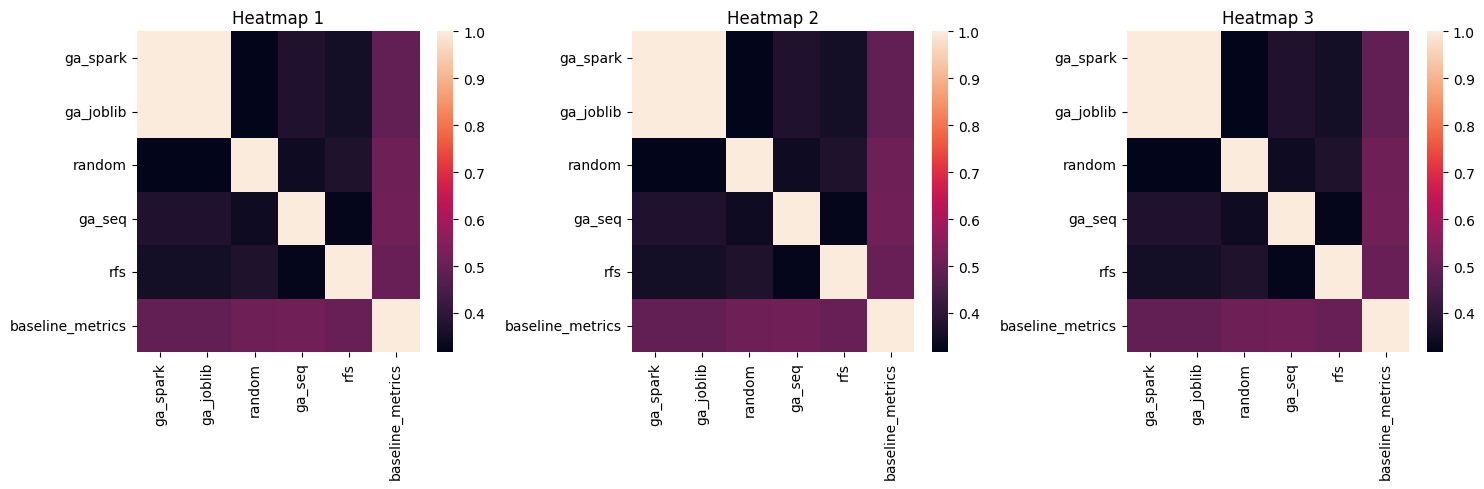

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plotting heatmaps on each subplot
for i, ax in enumerate(axes):
    df_subset = df_experiment[(df_experiment.backend_prefer=="processes") & (df_experiment.model=="logistic")].reset_index(drop=True)
    df_overlap = feature_jaccard_overlap(df=df_subset,dataset="sylva_agnostic",algorithms=algorithms)
    sns.heatmap(df_overlap, ax=ax)
    ax.set_title(f'Heatmap {i+1}')

plt.tight_layout()
plt.show()

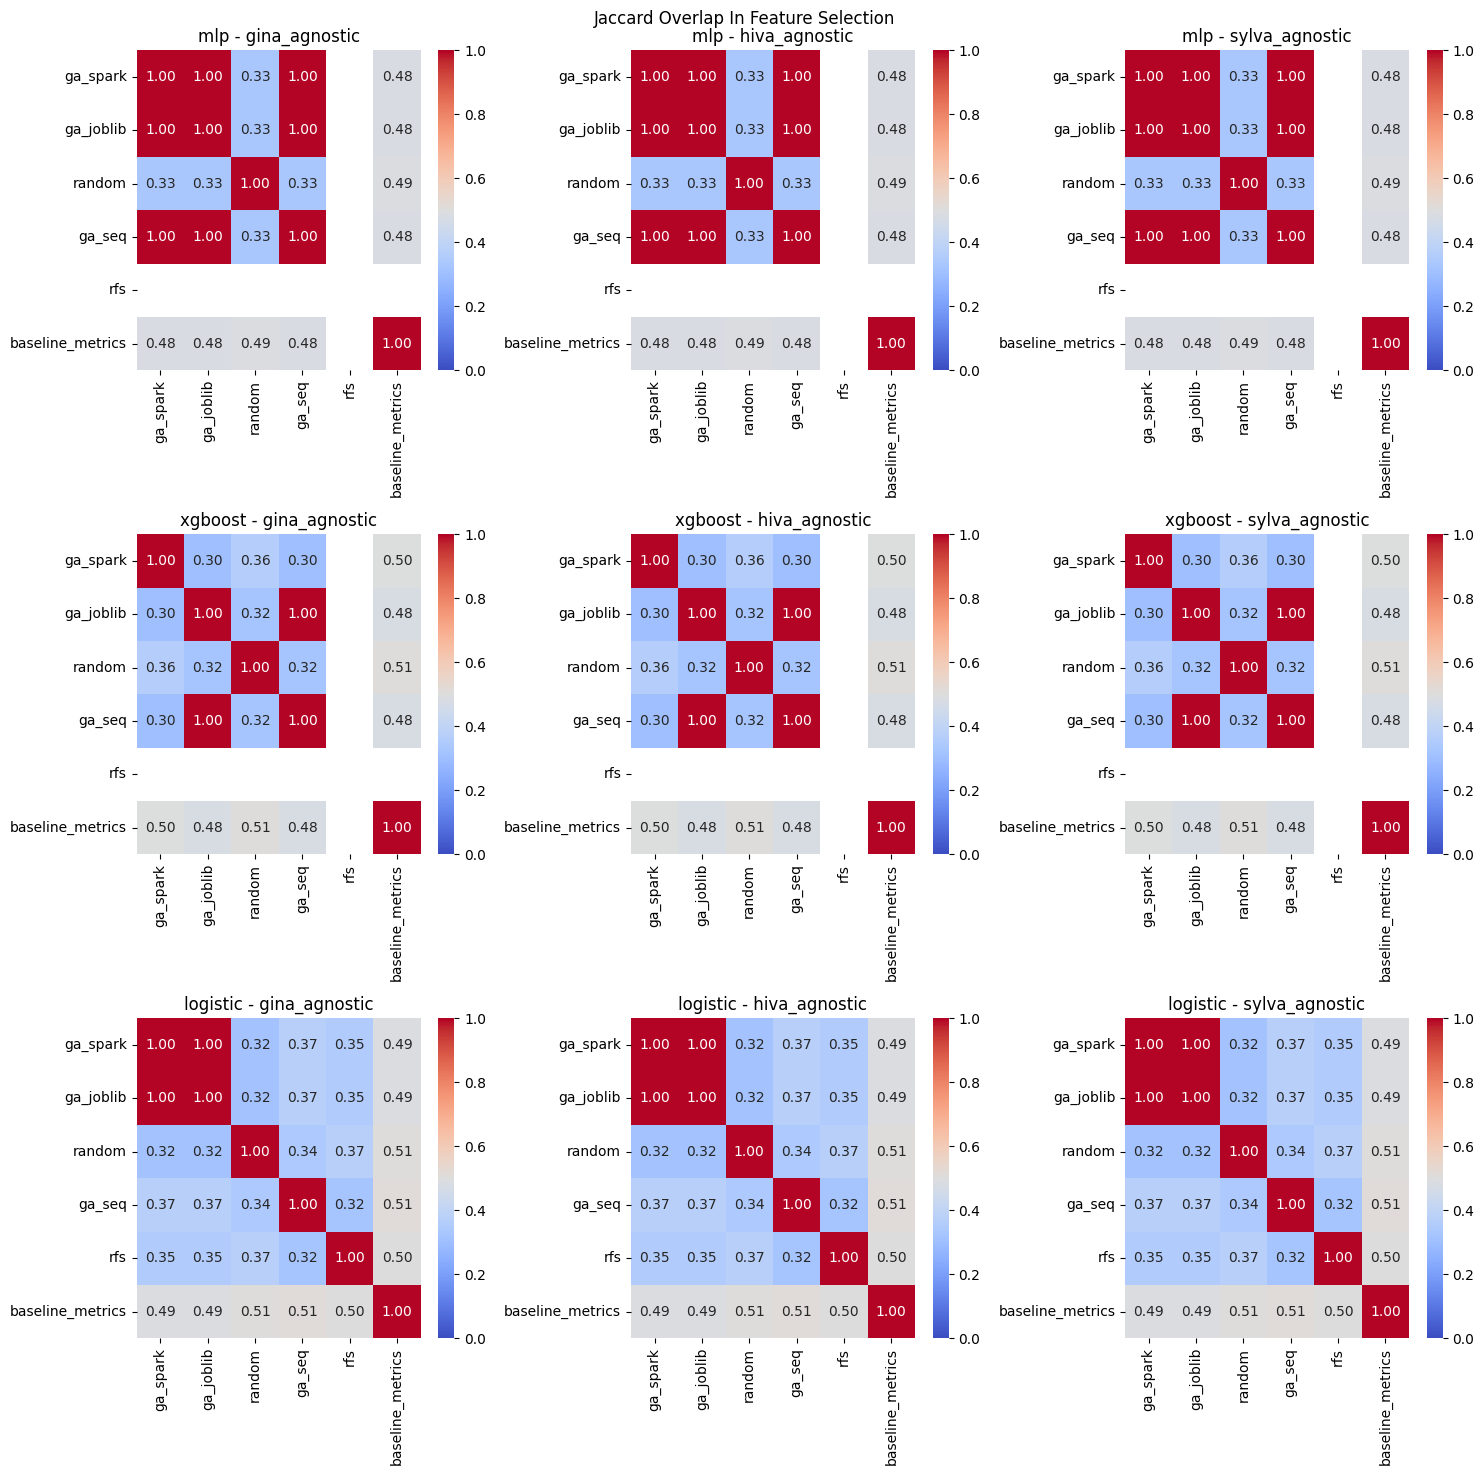

In [78]:
data = {
    (model, dataset): feature_jaccard_overlap(df=df_experiment[(df_experiment.model==model)],dataset="sylva_agnostic",algorithms=algorithms)  # Sample data for each combination
    for model in models
    for dataset in datasets
}

# Creating a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 rows, 3 columns

# Plotting heatmaps on each subplot
for i, model in enumerate(models):
    for j, dataset in enumerate(datasets):
        sns.heatmap(data[(model, dataset)], ax=axes[i, j], cmap='coolwarm', vmin=0, vmax=1, annot=True, fmt='.2f')
        axes[i, j].set_title(f'{model} - {dataset}')
        axes[i, j].set_xlabel('')  # Remove x-axis label for better readability
        axes[i, j].set_ylabel('') 

plt.suptitle("Jaccard Overlap In Feature Selection")
plt.tight_layout()
plt.savefig(os.path.join("images","jaccard_overlap.pdf"),dpi=1600)
plt.show()

## EXAMPLE IMAGE

In [18]:
from colorama import Fore, Back, Style
from IPython.display import display, Latex

In [19]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True,as_frame=True)
print(Fore.RED + "Full Dataset")
print(Fore.BLACK + f"{X[:5].to_string(index=False)}")
print()

c_l = np.array([0,0,1,1])
print(Fore.RED + "\nChromosome l")
display(Latex('$c_{l}$='+f'{c_l}'))
print()

X_ga = X.iloc[:,c_l==1]

print(Fore.RED + "Genetic Algorithm Subset")
print(Fore.BLACK + f"{X_ga[:5].to_string(index=False)}")

Full Dataset
 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
               5.1               3.5                1.4               0.2
               4.9               3.0                1.4               0.2
               4.7               3.2                1.3               0.2
               4.6               3.1                1.5               0.2
               5.0               3.6                1.4               0.2


Chromosome l


<IPython.core.display.Latex object>


Genetic Algorithm Subset
 petal length (cm)  petal width (cm)
               1.4               0.2
               1.4               0.2
               1.3               0.2
               1.5               0.2
               1.4               0.2
